In [149]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

from typing import List
from random import randint
from numba import prange, jit

In [150]:
N = 50                  # size of array
SIZE = N * N
SWAPS = pow(10, 6)      # amount of swaps cells

HAPPY_RATION = 3        # number of neighbors to be happy
OCCUPIED_RATION = 0.45  # occupied in percentages (separate for BLUE & RED)
VACANT_RATION = 0.1     # vacant places 

SCATTER_SIZE = N/10 * 2 # size of scatter

BLUE, RED, WHITE = 0, 1, -1 # value of colors
VACANT = WHITE


In [151]:
def pltcolor(arr: List) -> List:
    """Return list of point colors"""
    colors_set = {BLUE: 'blue', RED: 'red', VACANT: 'white'}
    colors = list()
    for item in arr:
        colors.append(colors_set.get(item))
    return colors


# @jit(parallel=True, nopython=True)
def relocation(arr: List):
    """Relocation """
    matrix = np.reshape(arr.copy(), (N, N))
    vacant = [[id//N, id%N] for id, value in enumerate(arr) if value == VACANT]
    i = 0
    while i < SWAPS:
        y = randint(0, N-1)
        x = randint(0, N-1)
        if matrix[y][x] is not VACANT:
            i+=1
            neighbors = list()
            if y == 0:
                if x == 0:
                    neighbors.extend([matrix[y][x+1], matrix[y+1][x], matrix[y+1][x+1]])
                elif x == N-1:
                    neighbors.extend([matrix[y][x-1], matrix[y+1][x], matrix[y+1][x-1]])
                else:
                    neighbors.extend([matrix[y+1][x-1], matrix[y+1][x], matrix[y+1][x+1],
                                        matrix[y][x-1], matrix[y][x+1]])
            elif y == N-1:
                if x == 0:
                    neighbors.extend([matrix[y][x+1], matrix[y-1][x], matrix[y-1][x+1]])
                elif x == N-1:
                    neighbors.extend([matrix[y][x-1], matrix[y-1][x], matrix[y-1][x-1]])
                else:
                    neighbors.extend([matrix[y-1][x-1], matrix[y-1][x], matrix[y-1][x+1],
                                        matrix[y][x-1], matrix[y][x+1]])
            else:
                if x == 0:
                    neighbors.extend([matrix[y+1][x], matrix[y+1][x+1], matrix[y][x+1],
                                        matrix[y-1][x-1], matrix[y-1][x]])
                if x == N-1:
                    neighbors.extend([matrix[y+1][x], matrix[y+1][x-1], matrix[y][x-1],
                                        matrix[y-1][x-1], matrix[y-1][x]])
                else:
                    neighbors.extend([matrix[y+1][x+1], matrix[y+1][x], matrix[y+1][x-1],
                                        matrix[y-1][x+1], matrix[y-1][x], matrix[y-1][x-1],
                                        matrix[y][x+1], matrix[y][x-1]])
            
            if neighbors.count(matrix[y][x]) < HAPPY_RATION:
                index = randint(0, len(vacant)-1)
                vacant_y = vacant[index][0]
                vacant_x = vacant[index][1]

                arr[vacant_y*N + vacant_x] = matrix[y][x]
                arr[y*N + x] = VACANT
                
                matrix[vacant_y][vacant_x] = matrix[y][x]
                matrix[y][x] = VACANT
                
                vacant.pop(index)
                vacant.append([y, x])
                


In [152]:
array = np.zeros(SIZE, dtype=np.int8)
# Brilliant way to fill array
array[:int(SIZE*OCCUPIED_RATION)] = 1
array[-int(SIZE*VACANT_RATION):] = -1
np.random.shuffle(array)

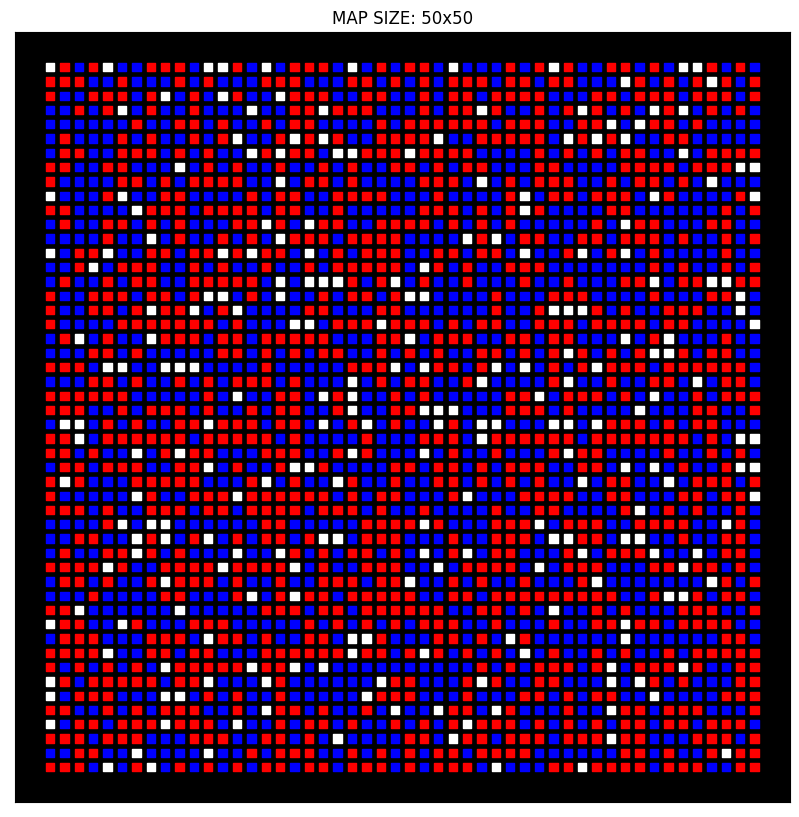

In [153]:
ox = [i for i in range(N)] * N
oy = [i//N for i in range(N*N)]

fig, ax = plt.subplots()
ax.scatter(x=ox, y=oy, marker='s', c=pltcolor(arr=array))

ax.set_facecolor('black')
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)

fig.set_figwidth(SCATTER_SIZE) 
fig.set_figheight(SCATTER_SIZE)
ax.set_title(f'MAP SIZE: {N}x{N}')

plt.show()

In [154]:
relocation(arr=array)

False


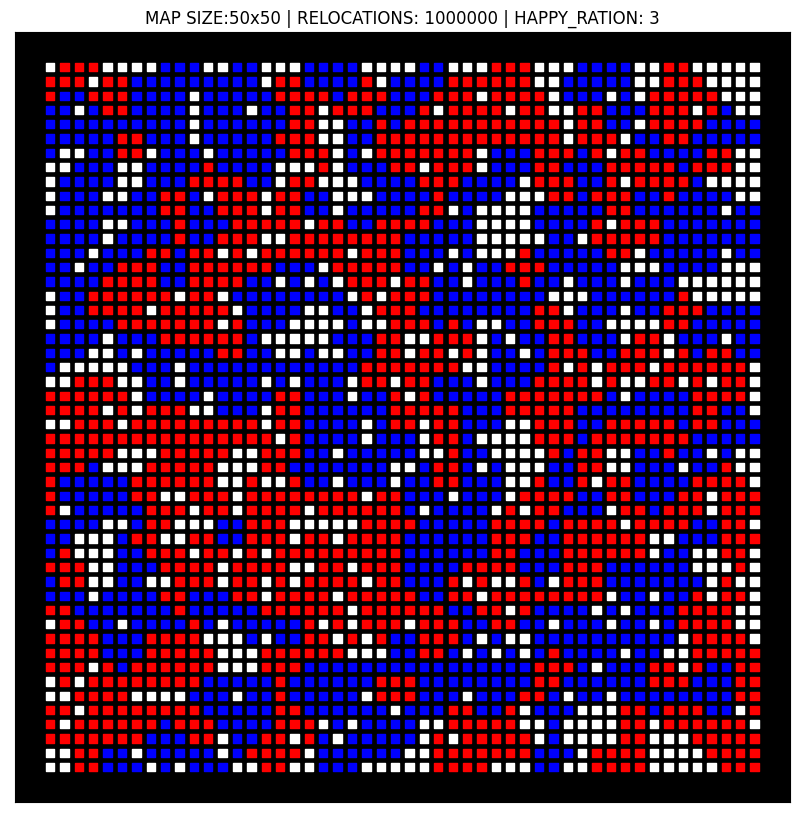

In [155]:
fig, ax = plt.subplots()
ax.scatter(x=ox, y=oy, marker='s', c=pltcolor(arr=array))
ax.set_facecolor('black')
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)

fig.set_figwidth(SCATTER_SIZE) 
fig.set_figheight(SCATTER_SIZE)
ax.set_title(f'MAP SIZE:{N}x{N} | RELOCATIONS: {SWAPS} | HAPPY_RATION: {HAPPY_RATION}')

d = list(array)
print(d.count(VACANT) <= VACANT_RATION*SIZE)

plt.show()